# Question 1


In [ ]:
import pandas as pd

file_path = 'rocs_individual_assessment_data.csv'

df = pd.read_csv(file_path)

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for Instagram data
instagram_df = df[df['app.name'].str.lower() == 'instagram']

# Calculate the total number of days in the dataset for each country
total_days = instagram_df['date'].nunique()

# Calculate the number of days Instagram is in the top apps for each country
instagram_days = instagram_df.groupby('country.name')['date'].nunique()

# Calculate the average rank of Instagram for each country
average_rank = instagram_df.groupby('country.name')['rank'].mean()

# Calculate the weighted mean rank: (average rank * days Instagram appeared) / total days
weighted_mean_rank = (total_days / instagram_days) * average_rank

# Combine results into a single DataFrame
result = weighted_mean_rank.to_frame(name='weighted_mean_rank')

# Sort the results by weighted_mean_rank in ascending order
result = result.sort_values(by='weighted_mean_rank', ascending=True)

# Create a new dataframe with 'country.name' to merge with the result dataframe
ldc_data = df.groupby('country.name')['ldc'].first()

# Merge the ldc data with the result dataframe
result = pd.merge(result, ldc_data, on='country.name', how='left')

print(result.head(150))

                      weighted_mean_rank    ldc
country.name                                   
Netherlands Antilles            1.225806  False
Liechtenstein                   1.225806  False
India                           1.806452  False
Uzbekistan                      2.677419  False
Tajikistan                      3.161290  False
...                                  ...    ...
Zambia                         42.183813   True
Denmark                        45.154578  False
Iceland                        46.822400  False
Bangladesh                    372.000000   True
Norway                        496.000000  False

[140 rows x 2 columns]


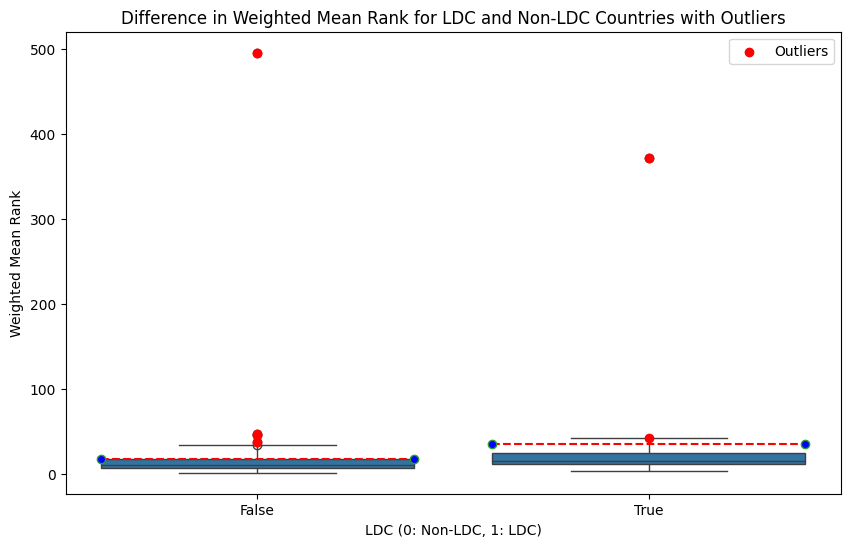

Outliers:
              weighted_mean_rank    ldc
country.name                           
Sweden                 37.096774  False
Zambia                 42.183813   True
Denmark                45.154578  False
Iceland                46.822400  False
Bangladesh            372.000000   True
Norway                496.000000  False


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = result['weighted_mean_rank'].quantile(0.25)
Q3 = result['weighted_mean_rank'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identifying outliers
outliers = result[(result['weighted_mean_rank'] < lower_bound) | (result['weighted_mean_rank'] > upper_bound)]

# Create the boxplot with the mean displayed, and highlight outliers
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='ldc',
    y='weighted_mean_rank',
    data=result,
    showmeans=True,
    meanline=True,
    meanprops={'color': 'red', 'linestyle': '--', 'linewidth': 1.5, 'marker': 'o', 'markerfacecolor': 'blue'}
)

# Highlight the outliers with red dots
plt.scatter(
    x=outliers['ldc'],
    y=outliers['weighted_mean_rank'],
    color='red',
    label='Outliers',
    zorder=5
)

plt.title('Difference in Weighted Mean Rank for LDC and Non-LDC Countries with Outliers')
plt.xlabel('LDC (0: Non-LDC, 1: LDC)')
plt.ylabel('Weighted Mean Rank')
plt.legend()
plt.show()

# Optionally, print out the outliers
print("Outliers:")
print(outliers)

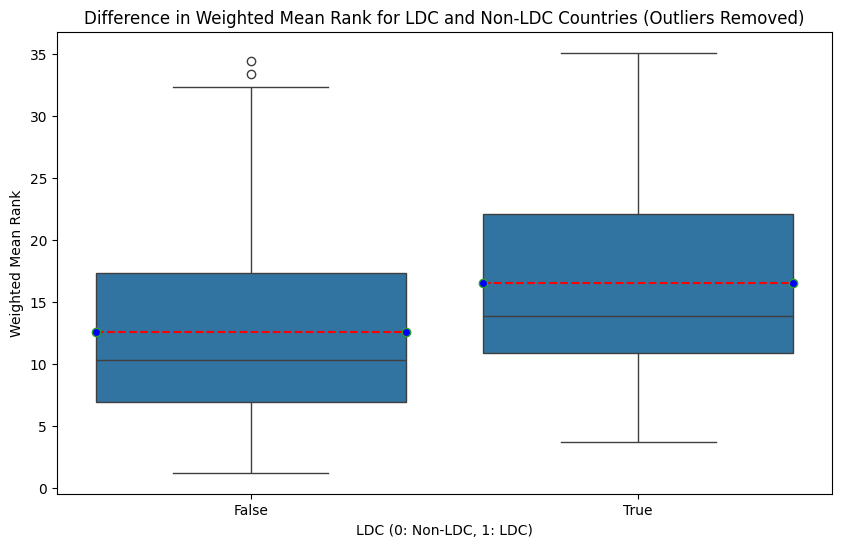

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Q1 = result['weighted_mean_rank'].quantile(0.25)
Q3 = result['weighted_mean_rank'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_no_outliers = result[~((result['weighted_mean_rank'] < lower_bound) | (result['weighted_mean_rank'] > upper_bound))]

# Create the boxplot with the mean displayed
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='ldc',
    y='weighted_mean_rank',
    data=result_no_outliers,
    showmeans=True,
    meanline=True,
    meanprops={'color': 'red', 'linestyle': '--', 'linewidth': 1.5, 'marker': 'o', 'markerfacecolor': 'blue'}
)
plt.title('Difference in Weighted Mean Rank for LDC and Non-LDC Countries (Outliers Removed)')
plt.xlabel('LDC (0: Non-LDC, 1: LDC)')
plt.ylabel('Weighted Mean Rank')
plt.show()

In [ ]:
# ldc_stats = result_no_outliers[result_no_outliers['ldc'] == True]['weighted_mean_rank'].describe()
# non_ldc_stats = result_no_outliers[result_no_outliers['ldc'] == False]['weighted_mean_rank'].describe()

ldc_stats = result[result['ldc'] == True]['weighted_mean_rank'].describe()
non_ldc_stats = result[result['ldc'] == False]['weighted_mean_rank'].describe()


print("LDC Group Statistics:")
print(ldc_stats)

print("\nNon-LDC Group Statistics:")
print(non_ldc_stats)

LDC Group Statistics:
count     20.000000
mean      35.591449
std       79.790747
min        3.741935
25%       11.217742
50%       15.516129
75%       24.354839
max      372.000000
Name: weighted_mean_rank, dtype: float64

Non-LDC Group Statistics:
count    120.000000
mean      17.382335
std       44.945588
min        1.225806
25%        7.112903
50%       10.516129
75%       17.766129
max      496.000000
Name: weighted_mean_rank, dtype: float64


In [ ]:
from scipy.stats import ttest_ind
import numpy as np

# Extract raw data for LDCs and non-LDCs
ldc_data = result_no_outliers[result_no_outliers['ldc'] == True]['weighted_mean_rank']
non_ldc_data = result_no_outliers[result_no_outliers['ldc'] == False]['weighted_mean_rank']

In [ ]:
print("LDC Data:")
print(ldc_data)
print("\nNon-LDC Data:")
print(non_ldc_data)

LDC Data:
country.name
Cambodia          3.741935
Laos              6.290323
Tanzania          6.935484
Haiti            10.258065
Benin            10.709677
Mozambique       11.387097
Rwanda           13.290323
Angola           13.612903
Myanmar          13.741935
Senegal          14.064516
Yemen            16.967742
Nepal            18.032258
Togo             21.903226
Guinea-Bissau    22.129032
Uganda           23.354839
Mali             27.354839
Niger            28.741935
Burkina          35.129032
Name: weighted_mean_rank, dtype: float64

Non-LDC Data:
country.name
Netherlands Antilles     1.225806
Liechtenstein            1.225806
India                    1.806452
Uzbekistan               2.677419
Tajikistan               3.161290
                          ...    
Ireland                 30.870968
Australia               31.322581
Kenya                   32.354839
Papua New Guinea        33.451613
Taiwan                  34.451613
Name: weighted_mean_rank, Length: 116, dtype: fl

In [ ]:
from scipy.stats import ttest_ind, levene

if len(ldc_data) > 1 and len(non_ldc_data) > 1:
    # Perform Levene's Test
    stat_levene, p_value_levene = levene(ldc_data, non_ldc_data)
    if p_value_levene < 0.05:
        print("Levene's Test: Variances are significantly different (p < 0.05). Using Welch's t-test.")
        equal_var = False
    else:
        print("Levene's Test: Variances are not significantly different (p >= 0.05). Using Student's t-test.")
        equal_var = True

Levene's Test: Variances are not significantly different (p >= 0.05). Using Student's t-test.


In [ ]:
# Handle missing values
ldc_data = ldc_data.dropna()
non_ldc_data = non_ldc_data.dropna()

# Perform the independent samples t-test
if len(ldc_data) > 1 and len(non_ldc_data) > 1:  # Ensure enough data points
    t_stat, p_value = ttest_ind(ldc_data, non_ldc_data, equal_var=True)
    print("Independent Samples T-Test:")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    # Interpret the p-value
    if p_value < 0.05:
        print("\nThe p-value is less than 0.05, indicating a statistically significant difference between the mean weighted ranks of Instagrams's popularity in LDCs and non-LDCs.")
    else:
        print("\nThe p-value is greater than 0.05, indicating no statistically significant difference.")
else:
    print("Not enough data points in one or both groups to perform the t-test.")


Independent Samples T-Test:
T-statistic: 2.018822513908348, P-value: 0.04553123453968442

The p-value is less than 0.05, indicating a statistically significant difference between the mean weighted ranks of Instagrams's popularity in LDCs and non-LDCs.


In [ ]:
# Calculate Cohen's d
def cohens_d(group1, group2):
    diff = np.mean(group1) - np.mean(group2)
    n1, n2 = len(group1), len(group2)
    var1 = np.var(group1, ddof=1)
    var2 = np.var(group2, ddof=1)
    pooled_std = np.sqrt(((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2))
    return diff / pooled_std

cohens_d_value = cohens_d(ldc_data, non_ldc_data)

print("Cohen's d:", cohens_d_value)

# Interpretation of Cohen's d
if abs(cohens_d_value) < 0.2:
    effect_size = "Negligible"
elif abs(cohens_d_value) < 0.5:
    effect_size = "Small"
elif abs(cohens_d_value) < 0.8:
    effect_size = "Medium"
else:
    effect_size = "Large"

print(f"Effect Size: {effect_size}")
print(f"T-statistic: {t_stat}, P-value: {p_value}")

Cohen's d: 0.5114289302791456
Effect Size: Medium
T-statistic: 2.018822513908348, P-value: 0.04553123453968442


# Question 2

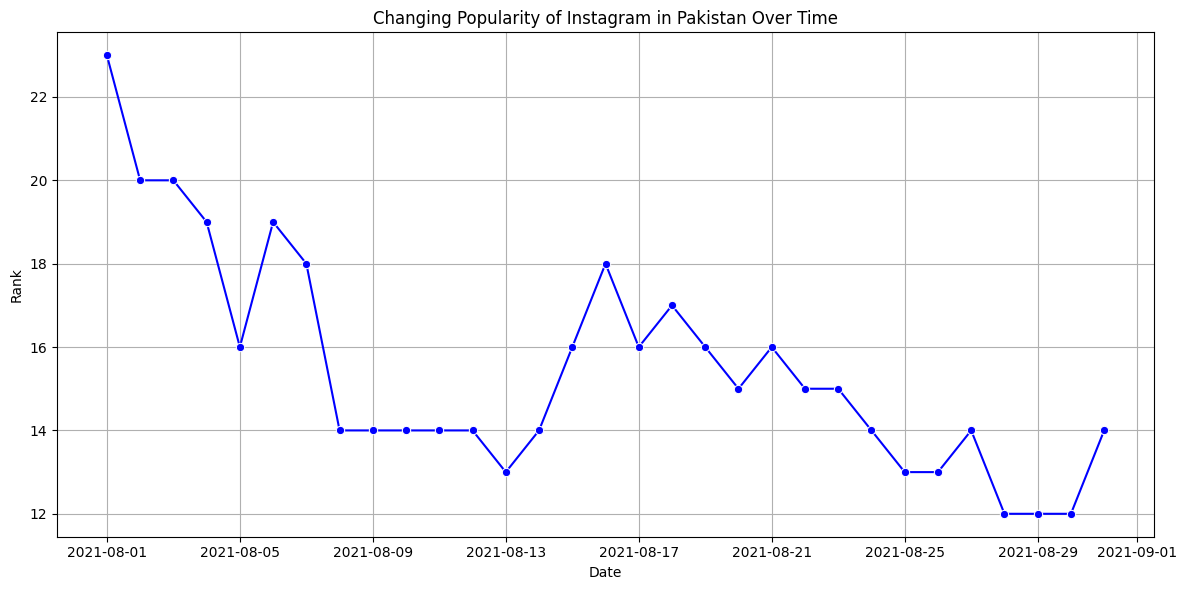

In [ ]:
# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for Instagram data in Pakistan
instagram_pakistan = df[
    (df['app.name'].str.lower() == 'instagram') &
    (df['country.name'].str.lower() == 'pakistan')
]

# Calculate daily rank (assuming no duplicates for the same date)
daily_rank = instagram_pakistan[['date', 'rank']]

# Plot Instagram's popularity over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='rank', data=daily_rank, marker='o', color='b')

# Add labels and titles
plt.title('Changing Popularity of Instagram in Pakistan Over Time')
plt.xlabel('Date')
plt.ylabel('Rank')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
instagram_pakistan['rank'].describe()

,rank
count,31.000000
mean,15.483871
std,2.669219
min,12.000000
25%,14.000000
50%,15.000000
75%,16.500000
max,23.000000


In [ ]:
import scipy.stats as stats

# Calculate the number of days since the start date
daily_rank.loc[:, 'days'] = (daily_rank['date'] - daily_rank['date'].min()).dt.days

# Calculate Spearman's rank correlation
rho, p_value = stats.spearmanr(daily_rank['days'], daily_rank['rank'])

# Print the Spearman's rank p-value
print(f"P-value: {p_value:.10f}")

# Interpret the results
if p_value < 0.05:
    print("The p-value is less than 0.05, indicating a statistically significant monotonic relationship.")
else:
    print("The p-value is greater than 0.05, indicating no significant monotonic relationship.")
    print("This suggests there is no clear monotonic relationship between time and Instagram's rank.")


P-value: 0.0000338823
The p-value is less than 0.05, indicating a statistically significant monotonic relationship.


In [ ]:
print(f"Spearman's Rank Correlation Coefficient (rho): {rho:.4f}")
if rho > 0:
  print("The positive rho suggests that as time progresses, Instagram's rank increases (decreasing popularity).")
elif rho < 0:
  print("The negative rho suggests that as time progresses, Instagram's rank decreases (increasing popularity).")

Spearman's Rank Correlation Coefficient (rho): -0.6727
The negative rho suggests that as time progresses, Instagram's rank decreases (increasing popularity).
